# 1. Creating an input and output value

In [1]:
import numpy as np

# Define the input and output variables
min_val = -2
max_val = 2
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = np.exp(x**2-3)-x**2+1.5

# 2. Plot the graph

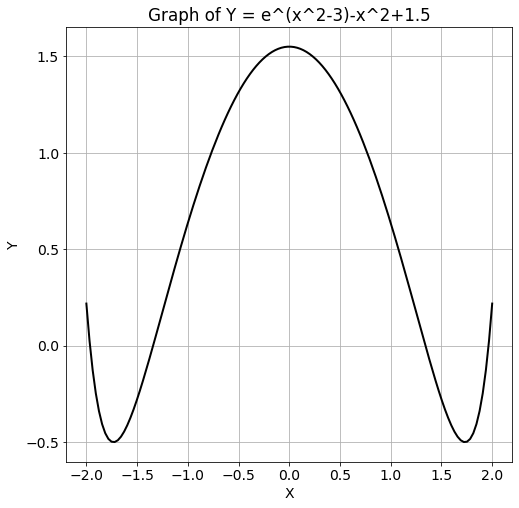

In [2]:
import matplotlib.pyplot as plt

# Set the font size for the plot
plt.rcParams.update({'font.size': 14})

# Create the figure and axis objects
fig, ax = plt.subplots(figsize = (8,8))

# Plot the data
ax.plot(x, y, linewidth=2, color='black')

# Set the x and y axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Graph of Y = e^(x^2-3)-x^2+1.5')

# Add gridlines
ax.grid(True)

# Show the plot
plt.show()

# 3. Trained a deep learning momdel

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the input and output variables
min_val = -2
max_val = 2
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = np.exp(x**2-3)-x**2+1.5

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(x, y, epochs=100, batch_size=32)

# Make predictions using the trained model
predictions = model.predict(x)

# Evaluate the model
loss = model.evaluate(x, y)

# Print the loss
print("Mean squared error:", loss)

Epoch 1/100
5/5 [==============================] - 4s 5ms/step - loss: 0.9031
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 0.8245
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 0.7860
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 0.7655
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.7392
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 0.7148
Epoch 7/100
5/5 [==============================] - 0s 42ms/step - loss: 0.6864
Epoch 8/100
5/5 [==============================] - 0s 24ms/step - loss: 0.6500
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6109
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5660
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5189
Epoch 12/100
5/5 [==============================] - 0s 10ms/step - loss: 0.4730
Epoch 13/100
5/5 [==============================] - 0s 

# 4. Plotting the actual vs prediction

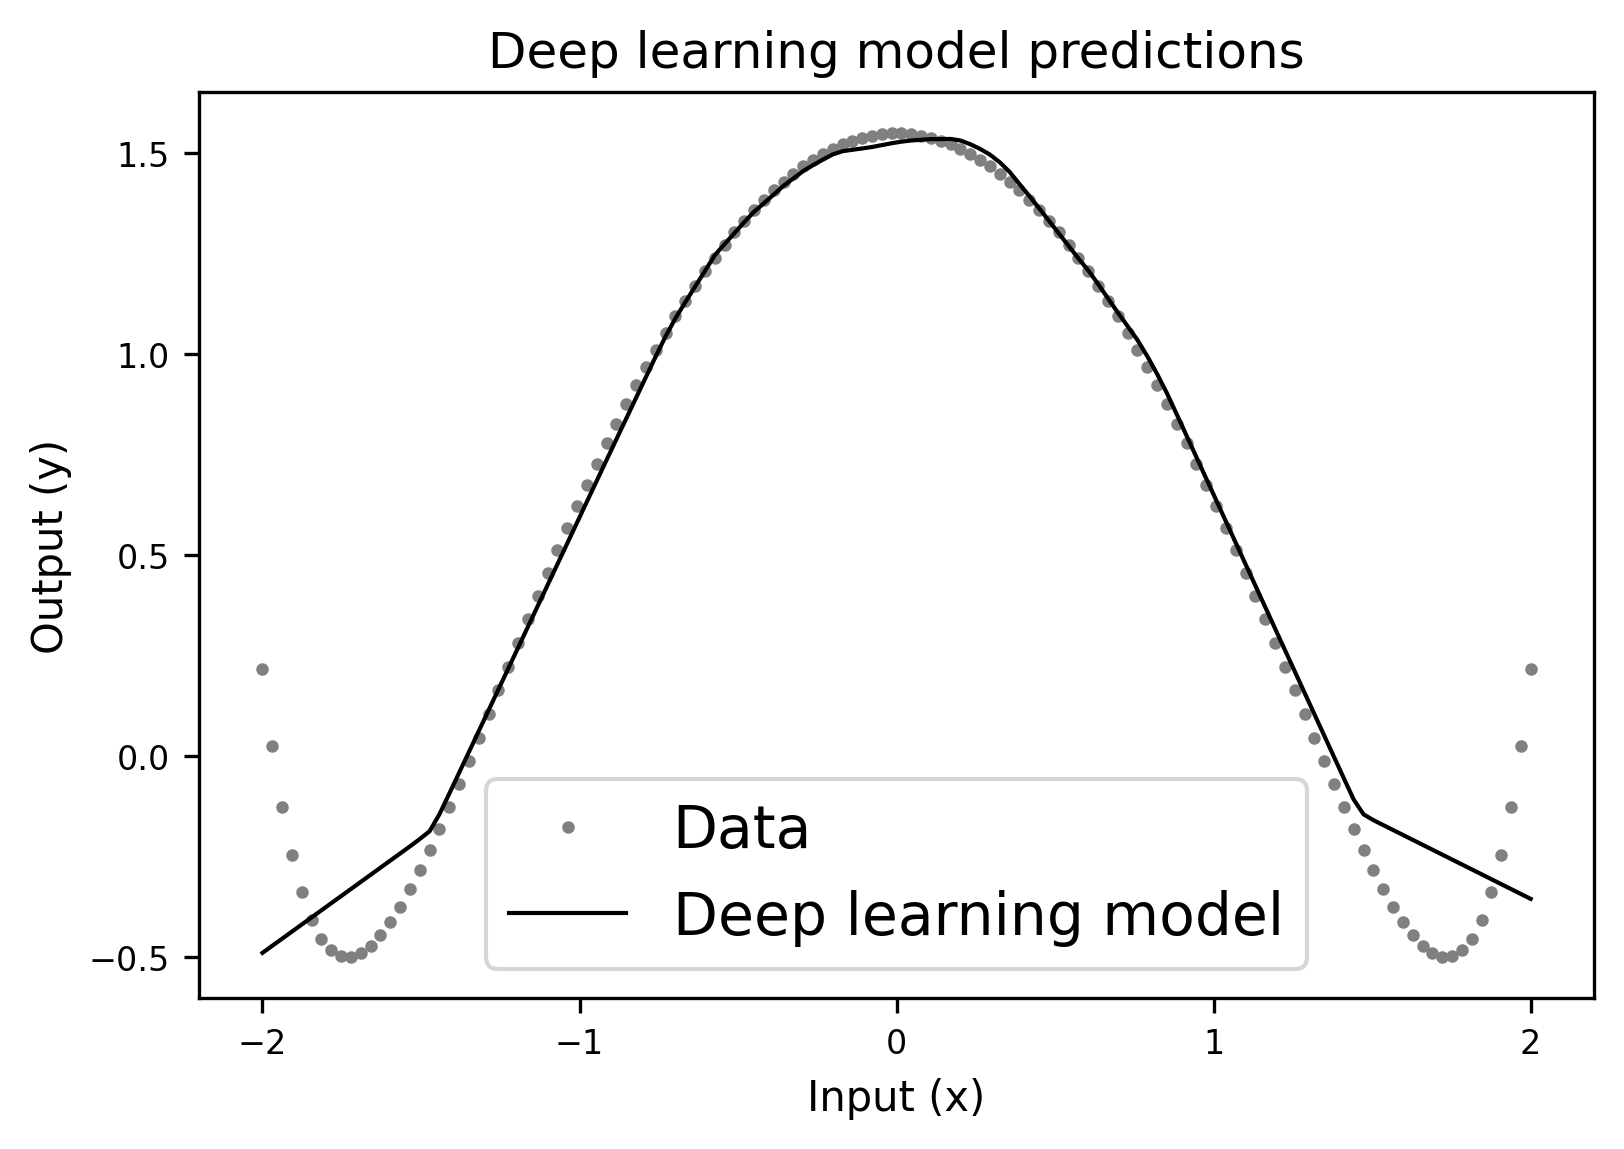

In [4]:
# Create a new figure
fig = plt.figure(figsize=(6, 4), dpi=300, facecolor='white')

# Plot the input data and the deep learning model predictions
plt.plot(x, y, '.', markersize=4, color='gray', label='Data')
plt.plot(x, predictions, '-', linewidth=1, color='black', label='Deep learning model')

# Add axis labels and a title
plt.xlabel('Input (x)', fontsize=10)
plt.ylabel('Output (y)', fontsize=10)
plt.title('Deep learning model predictions', fontsize=12)

# Increase the font size of the axis tick labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Remove the legend
plt.legend()

# Save the figure
plt.savefig('publication_figure.png', dpi=300)

# Show the figure
plt.show()

# 5. Performing cross-validation

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold

# Define the input and output variables
min_val = -2
max_val = 2
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = np.exp(x**2-3)-x**2+1.5

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True)

# Perform cross-validation
scores = []
for train_index, test_index in kfold.split(x):
    # Split the data into training and testing sets
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training set
    model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Evaluate the model on the testing set
    loss = model.evaluate(x_test, y_test, verbose=0)

    # Add the score to the list of scores
    scores.append(loss)

# Print the mean and standard deviation of the scores
print("Mean score:", np.mean(scores))
print("Standard deviation:", np.std(scores))


Mean score: 0.006299001362640411
Standard deviation: 0.004053694042609029


# 6. Increasing accuracy

## 6.1. Number of epochs

In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold

# Define the input and output variables
min_val = -2
max_val = 2
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = np.exp(x**2-3)-x**2+1.5

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True)

# Define the range of epochs to test
epochs_range = range(10, 110, 10)

# Perform cross-validation for each epoch value
best_score = np.inf
best_epochs = None
for epochs in epochs_range:
    scores = []
    for train_index, test_index in kfold.split(x):
        # Split the data into training and testing sets
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model on the training set
        model.fit(x_train, y_train, epochs=epochs, batch_size=32, verbose=0)

        # Evaluate the model on the testing set
        loss = model.evaluate(x_test, y_test, verbose=0)

        # Add the score to the list of scores
        scores.append(loss)

    # Calculate the mean score for the current epoch value
    mean_score = np.mean(scores)

    # Check if the current epoch value is better than the previous best epoch value
    if mean_score < best_score:
        best_score = mean_score
        best_epochs = epochs

# Print the best epoch value and its corresponding score
print("Best number of epochs:", best_epochs)
print("Best mean score:", best_score)

Best number of epochs: 100
Best mean score: 0.0002068492292892188


## 6.2. Number of  hidden layer

In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold

# Define the input and output variables
min_val = -2
max_val = 2
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = np.exp(x**2-3)-x**2+1.5

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True)

# Define the number of hidden layers to test
num_hidden_layers_list = [1, 2, 3, 4, 5]

# Perform cross-validation for each number of hidden layers
for num_hidden_layers in num_hidden_layers_list:
    # Define the model architecture
    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    for i in range(num_hidden_layers):
        model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mse', optimizer='adam')

    # Perform cross-validation
    scores = []
    for train_index, test_index in kfold.split(x):
        # Split the data into training and testing sets
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model on the training set
        model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

        # Evaluate the model on the testing set
        loss = model.evaluate(x_test, y_test, verbose=0)

        # Add the score to the list of scores
        scores.append(loss)

    # Print the mean and standard deviation of the scores for this number of hidden layers
    print("Number of hidden layers:", num_hidden_layers)
    print("Mean score:", np.mean(scores))
    print("Standard deviation:", np.std(scores))

Number of hidden layers: 1
Mean score: 0.022819405794143675
Standard deviation: 0.004631290214567275
Number of hidden layers: 2
Mean score: 0.009296161902602762
Standard deviation: 0.009145897698899126
Number of hidden layers: 3
Mean score: 0.017853351274970918
Standard deviation: 0.0172627811203198
Number of hidden layers: 4
Mean score: 0.009739147103391587
Standard deviation: 0.012475103268746108
Number of hidden layers: 5
Mean score: 0.005768753704614937
Standard deviation: 0.0035000464639564416


## 6.3. Finding the best value for neuron

In [8]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold

# Define the input and output variables
min_val = -2
max_val = 2
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = np.exp(x**2-3)-x**2+1.5

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True)

# Loop through different numbers of neurons in the first layer
for n_neurons in [16, 32, 64, 128]:

    # Define the model architecture
    model = Sequential()
    model.add(Dense(n_neurons, input_dim=1, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mse', optimizer='adam')

    # Perform cross-validation
    scores = []
    for train_index, test_index in kfold.split(x):
        # Split the data into training and testing sets
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model on the training set
        model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

        # Evaluate the model on the testing set
        loss = model.evaluate(x_test, y_test, verbose=0)

        # Add the score to the list of scores
        scores.append(loss)

    # Print the mean and standard deviation of the scores for this number of neurons
    print("Number of neurons in the first layer:", n_neurons)
    print("Mean score:", np.mean(scores))
    print("Standard deviation:", np.std(scores))
    print()



Number of neurons in the first layer: 16
Mean score: 0.017646356392651795
Standard deviation: 0.016746110657186355

Number of neurons in the first layer: 32
Mean score: 0.01933510983362794
Standard deviation: 0.010604124653238105

Number of neurons in the first layer: 64
Mean score: 0.01732126222923398
Standard deviation: 0.009612676916741383

Number of neurons in the first layer: 128
Mean score: 0.011558263935148716
Standard deviation: 0.0111555358569667



## 6.4. Finding the best activation function

In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold

# Define the input and output variables
min_val = -2
max_val = 2
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = np.exp(x**2-3)-x**2+1.5

# Define the model architecture
def create_model(activation):
    model = Sequential()
    model.add(Dense(64, input_dim=1, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(16, activation=activation))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model

# Define the activation functions to test
activations = ['relu', 'sigmoid', 'tanh', 'linear']

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True)

# Perform cross-validation
results = {}
for activation in activations:
    scores = []
    for train_index, test_index in kfold.split(x):
        # Split the data into training and testing sets
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Create the model with the specified activation function
        model = create_model(activation)

        # Fit the model on the training set
        model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

        # Evaluate the model on the testing set
        loss = model.evaluate(x_test, y_test, verbose=0)

        # Add the score to the list of scores
        scores.append(loss)

    # Save the mean and standard deviation of the scores for this activation function
    results[activation] = {'mean': np.mean(scores), 'std': np.std(scores)}

# Print the results
for activation in activations:
    print("Activation function:", activation)
    print("Mean score:", results[activation]['mean'])
    print("Standard deviation:", results[activation]['std'])


Activation function: relu
Mean score: 0.01717628790065646
Standard deviation: 0.013535716605820019
Activation function: sigmoid
Mean score: 0.5529029488563537
Standard deviation: 0.06552221268676964
Activation function: tanh
Mean score: 0.0223980912938714
Standard deviation: 0.006513517457836482
Activation function: linear
Mean score: 0.56820068359375
Standard deviation: 0.049858629758760604


## 6.5. Find the best optimizer

In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold

# Define the input and output variables
min_val = -2
max_val = 2
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = np.exp(x**2-3)-x**2+1.5

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Define a list of optimizers to try
optimizers = ['sgd', 'adam', 'rmsprop']

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True)

# Perform cross-validation for each optimizer
for optimizer in optimizers:
    # Compile the model with the current optimizer
    model.compile(loss='mse', optimizer=optimizer)

    # Perform cross-validation
    scores = []
    for train_index, test_index in kfold.split(x):
        # Split the data into training and testing sets
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model on the training set
        model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

        # Evaluate the model on the testing set
        loss = model.evaluate(x_test, y_test, verbose=0)

        # Add the score to the list of scores
        scores.append(loss)

    # Print the mean and standard deviation of the scores for the current optimizer
    print("Optimizer:", optimizer)
    print("Mean score:", np.mean(scores))
    print("Standard deviation:", np.std(scores))


Optimizer: sgd
Mean score: 0.02270737513899803
Standard deviation: 0.01138901353054632
Optimizer: adam
Mean score: 0.007273709255969152
Standard deviation: 0.005869010298417399
Optimizer: rmsprop
Mean score: 0.006036750134080648
Standard deviation: 0.004038541592204261


# 7. Using the optimal model

In [11]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold

# Define the input and output variables
min_val = -2
max_val = 2
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = np.exp(x**2-3)-x**2+1.5

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True)

# Perform cross-validation
scores = []
for train_index, test_index in kfold.split(x):
    # Split the data into training and testing sets
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training set
    model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Evaluate the model on the testing set
    loss = model.evaluate(x_test, y_test, verbose=0)

    # Add the score to the list of scores
    scores.append(loss)

# Print the mean and standard deviation of the scores
print("Mean score:", np.mean(scores))
print("Standard deviation:", np.std(scores))



Mean score: 0.006979732774198055
Standard deviation: 0.003356117673239894


# 8. Saving the model

Mean score: 0.008365090854931622
Standard deviation: 0.012600026038598723


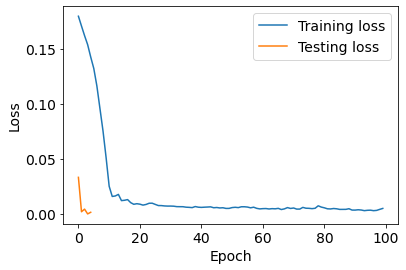

1/1 [==============================] - 0s 89ms/step
Prediction for input value -1.8101341218520508: [[-0.46503523]]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold

# Define the input and output variables
min_val = -2
max_val = 2
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = np.exp(x**2-3)-x**2+1.5

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True)

# Define lists to track the loss on the training and testing sets
train_losses = []
test_losses = []

# Perform cross-validation
for train_index, test_index in kfold.split(x):
    # Split the data into training and testing sets
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training set
    history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Record the loss on the training and testing sets at each epoch
    train_losses.append(history.history['loss'])
    test_loss = model.evaluate(x_test, y_test, verbose=0)
    test_losses.append(test_loss)

# Print the mean and standard deviation of the scores
print("Mean score:", np.mean(test_losses))
print("Standard deviation:", np.std(test_losses))

# Plot the learning curve
train_losses = np.mean(train_losses, axis=0)
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Testing loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the model
model.save('my_model.h5')

# Make a random prediction using the saved model
loaded_model = load_model('my_model.h5')
input_value = np.random.uniform(min_val, max_val)
prediction = loaded_model.predict(np.array([input_value]))
print("Prediction for input value {}: {}".format(input_value, prediction))


1/1 [==============================] - 0s 235ms/step


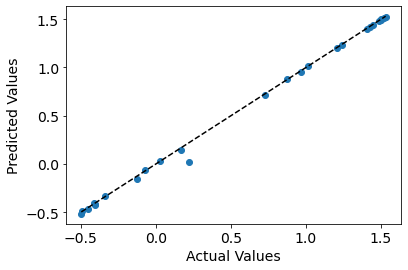

In [15]:
import matplotlib.pyplot as plt

# Load the saved model
saved_model = load_model('my_model.h5')

# Make predictions on the test set
y_pred = saved_model.predict(x_test)

# Make a plot of predicted vs actual values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()